# Project Analisis Data: [Bike Dataset]
- **Nama:** Josep Samuel Angelo
- **Email:** josepsamuel2003@gmail.com
- **ID Dicoding:** Josep Samuel

## Menentukan Pertanyaan Bisnis

### **Pertanyaan 1: Apakah libur (holiday) memiliki pengaruh terhadap pola penggunaan sepeda? Apakah ada peningkatan atau penurunan jumlah pengguna sepeda selama libur?**


### **Pertanyaan 2 : Bagaimana kondisi cuaca memengaruhi jumlah pengguna sepeda?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**


## Gathering Data

In [2]:
day_df=pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df=pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

### Data Frame Day

In [4]:
print('Data Frame Day')
day_df.info()

Data Frame Day
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#Check Missing Value df Day
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
#Check Duplicate df Day
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


### Data frame Hour

In [7]:
print('Data Frame Hour')
hour_df.info()

Data Frame Hour
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
#Check Missing Value df Hour
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
#Check Duplicate df Hour
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


## Cleaning Data

### Data Frame Day

In [10]:
#Mengubah nama kolom
day_df.rename(columns={'dteday' : 'date', 'yr': 'year', 'mnth': 'month'}, inplace=True)

In [11]:
#Mengganti tipe data
day_df['date'] = pd.to_datetime(day_df['date'])

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Data Frame Hour

In [13]:
#Mengganti tipe data
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [14]:
#Mengubah nama kolom
hour_df.rename(columns={'dteday' : 'date', 'yr': 'year', 'mnth': 'month', 'hr' : 'hour'}, inplace=True)

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

## Descriptive Statistic

In [16]:
#Melihat statistik deskriptif utk setiap kolom dalam df Day
np.round(day_df.describe(),2)

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2012-01-01 00:00:00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
min,1.00,2011-01-01 00:00:00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2011-07-02 12:00:00,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,2012-01-01 00:00:00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,2012-07-01 12:00:00,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,2012-12-31 00:00:00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00
std,211.17,NaN,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21


In [17]:
#Melihat statistik deskriptif utk setiap kolom dalam df Hour
np.round(hour_df.describe(),2)

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2012-01-02 04:08:34.552045568,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
min,1.00,2011-01-01 00:00:00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2011-07-04 00:00:00,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,2012-01-02 00:00:00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,2012-07-02 00:00:00,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,2012-12-31 00:00:00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00
std,5017.03,NaN,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39


## Variable Correlation

### Day Data Frame

Correlation between 'temp' and 'atemp': 0.9917015532294636


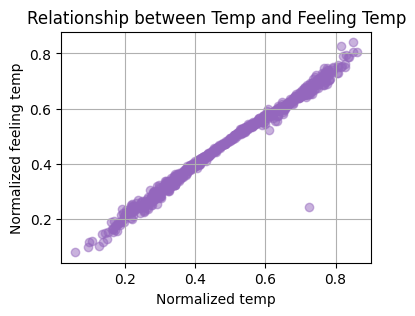

In [18]:
# Viewing the correlation between 'temp' and 'atemp'
correlation = day_df['temp'].corr(day_df['atemp'])
print("Correlation between 'temp' and 'atemp':", correlation)

purple_color = '#9467bd'
plt.figure(figsize=(4, 3))
plt.scatter(day_df['temp'], day_df['atemp'], alpha=0.5, color=purple_color)  # Menggunakan warna ungu
plt.title('Relationship between Temp and Feeling Temp')
plt.xlabel('Normalized temp')
plt.ylabel('Normalized feeling temp')
plt.grid(True)
plt.show()

Terlihat hubungan yang kuat dan positif antara temperatur aktual (**'temp'**) dan sensasi temperatur yang dirasakan (**'atemp'**). Pola garis lurus yang jelas dan padat dalam scatter plot menunjukkan bahwa perubahan dalam nilai temperatur aktual secara langsung dan proporsional mempengaruhi sensasi temperatur yang dirasakan. Dengan kata lain, semakin tinggi temperatur aktual, semakin tinggi pula sensasi temperatur yang dirasakan, dan sebaliknya.

Correlation between 'season' and 'temp': 0.3343148563990949


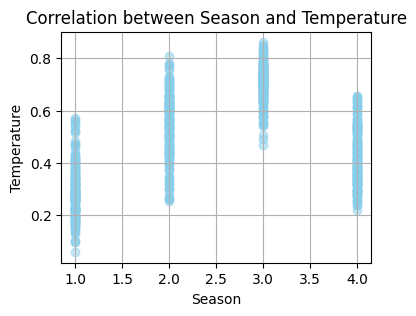

In [19]:
# Viewing the correlation between 'season' and 'temp'
correlation = day_df['season'].corr(day_df['temp'])
print("Correlation between 'season' and 'temp':", correlation)

plt.figure(figsize=(4, 3))
plt.scatter(day_df['season'], day_df['temp'], color='skyblue', alpha=0.5)
plt.title('Correlation between Season and Temperature')
plt.xlabel('Season')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

Musim dan temperatur memiliki hubungan positif, dimana musim panas umumnya lebih panas dan musim dingin lebih dingin.

## Data Frame Hour

Correlation between 'hour' and 'casual': 0.3012017302565363


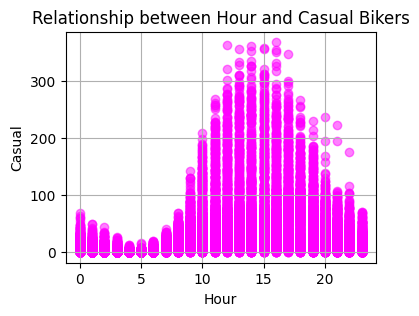

In [20]:
# Assuming hour_df is your DataFrame containing 'hour' and 'casual' columns
# Calculate the correlation
correlation = hour_df['hour'].corr(hour_df['casual'])
print("Correlation between 'hour' and 'casual':", correlation)

# Scatter plot to visualize the relationship
plt.figure(figsize=(4, 3))
plt.scatter(hour_df['hour'], hour_df['casual'], color='magenta', alpha=0.5)
plt.title('Relationship between Hour and Casual Bikers')
plt.xlabel('Hour')
plt.ylabel('Casual')
plt.grid(True)
plt.show()

## Visualization & Explanatory Analysis

### **Pertanyaan 1: Apakah libur (holiday) memiliki pengaruh terhadap pola penggunaan sepeda? Apakah ada peningkatan atau penurunan jumlah pengguna sepeda selama libur?**

Rata-rata jumlah pengguna sepeda pada hari libur: 3735.0
Rata-rata jumlah pengguna sepeda pada hari non-libur: 4527.104225352113


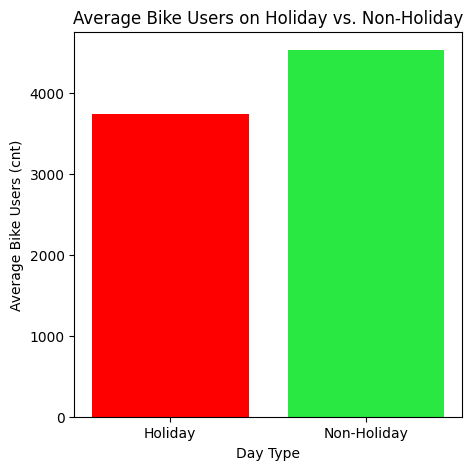

In [21]:
# Pisahkan data berdasarkan hari libur dan non-libur
holiday_data = day_df[day_df['holiday'] == 1]
non_holiday_data = day_df[day_df['holiday'] == 0]

# Hitung rata-rata jumlah pengguna sepeda untuk setiap kategori
avg_cnt_holiday = holiday_data['cnt'].mean()
avg_cnt_non_holiday = non_holiday_data['cnt'].mean()

# Tampilkan rata-rata jumlah pengguna sepeda pada hari libur dan non-libur
print("Rata-rata jumlah pengguna sepeda pada hari libur:", avg_cnt_holiday)
print("Rata-rata jumlah pengguna sepeda pada hari non-libur:", avg_cnt_non_holiday)

# Visualisasikan perbedaan jumlah pengguna sepeda antara hari libur dan non-libur
plt.figure(figsize=(5, 5))
plt.bar(['Holiday', 'Non-Holiday'], [avg_cnt_holiday, avg_cnt_non_holiday], color=['red', '#28E841'])
plt.title('Average Bike Users on Holiday vs. Non-Holiday')
plt.xlabel('Day Type')
plt.ylabel('Average Bike Users (cnt)')
plt.show()

### **Pertanyaan 2 : Bagaimana kondisi cuaca memengaruhi jumlah pengguna sepeda?**

<ipython-input-22-d11254c07807>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='weathersit', y='cnt', data=day_df, palette='muted', alpha=0.7)


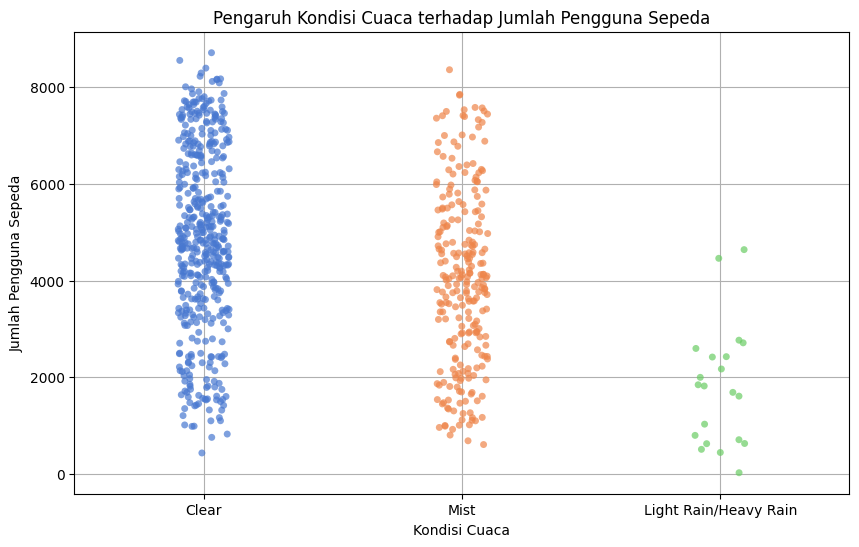

In [22]:
# Buat strip plot untuk membandingkan jumlah pengguna sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.stripplot(x='weathersit', y='cnt', data=day_df, palette='muted', alpha=0.7)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xticks(ticks=[0, 1, 2], labels=['Clear', 'Mist', 'Light Rain/Heavy Rain'])
plt.grid(True)
plt.show()


## Conclusion

-Conclution pertanyaan 1. Apakah libur (holiday) memiliki pengaruh terhadap pola penggunaan sepeda? Apakah ada peningkatan atau penurunan jumlah pengguna sepeda selama libur?

 -> Jawab:
Pola penggunaan sepeda cenderung lebih tinggi pada hari non-holiday daripada pada hari libur, mungkin karena orang-orang memilih aktivitas lain saat libur atau karena perbedaan rutinitas harian. Jumlah pengguna sepeda cenderung lebih rendah pada hari libur. Adapun strategi yang mungkin untuk menarik lebih banyak pengguna sepeda pada hari libur, seperti:
   *   Promo khusus dengan penawaran atau diskon liburan
   *   Penyesuaian persediaan sepeda berdasarkan data historis untuk memastikan ketersediaan yang memadai
   *   Mengadakan acara khusus atau tur bersepeda dengan tema liburan untuk meningkatkan minat masyarakat dalam bersepeda.

Conclution pertanyaan 2. Bagaimana kondisi cuaca memengaruhi jumlah pengguna sepeda?

 ->  Jawab:
Berdasarkan analisis visual pola penggunaan sepeda pada kondisi cuaca yang berbeda, terlihat bahwa jumlah pengguna sepeda cenderung lebih banyak saat cuaca cerah (clear) dan lebih sedikit saat cuaca hujan ringan (light rain). Hal ini menunjukkan bahwa kondisi cuaca memengaruhi pola penggunaan sepeda, dengan cuaca cerah cenderung meningkatkan jumlah penggunaan sepeda dan cuaca hujan ringan cenderung mengurangi jumlah penggunaan sepeda